** Data Visualization I**
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information
about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to
see if we can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger
is distributed by plotting a histogram

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-ticks')

SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [ ]:
titanic_data = pd.read_csv('/content/titanic-data.csv')

In [ ]:
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Drop the unwanted columns

In [ ]:

n_titanic_data=titanic_data.drop(['Cabin','Ticket','Name',
                                  'Fare','PassengerId'],axis=1)

In [ ]:
n_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
n_titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


We have only 714 Age values out of 891 of the entries and 2 values missing from the Embarked Variable. We will have to decide whether to omit these or impute them with some values when we model relationships based on Age or Embarked.

**Further Exploration - Visualizations**


We will change the keys to make them better readable and explore the initial composition of the passengers.

Make another copy of the new dataframe

Change the embarked keys to better readable ones

And the survived keys

In [ ]:



descript = n_titanic_data.copy()

descript.loc[:,'Embarked'].replace(['C','S','Q'],
                                      ['Cherbourg','Southampton','Queenstown'],
                                      inplace=True)

descript.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

In [ ]:
# Make a function to get the composition of the variables per number of passengers    
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    '''
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    
    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))
    
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)
    
    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

#Analysis of the Embarked variable.

Total No. of Embarked:889


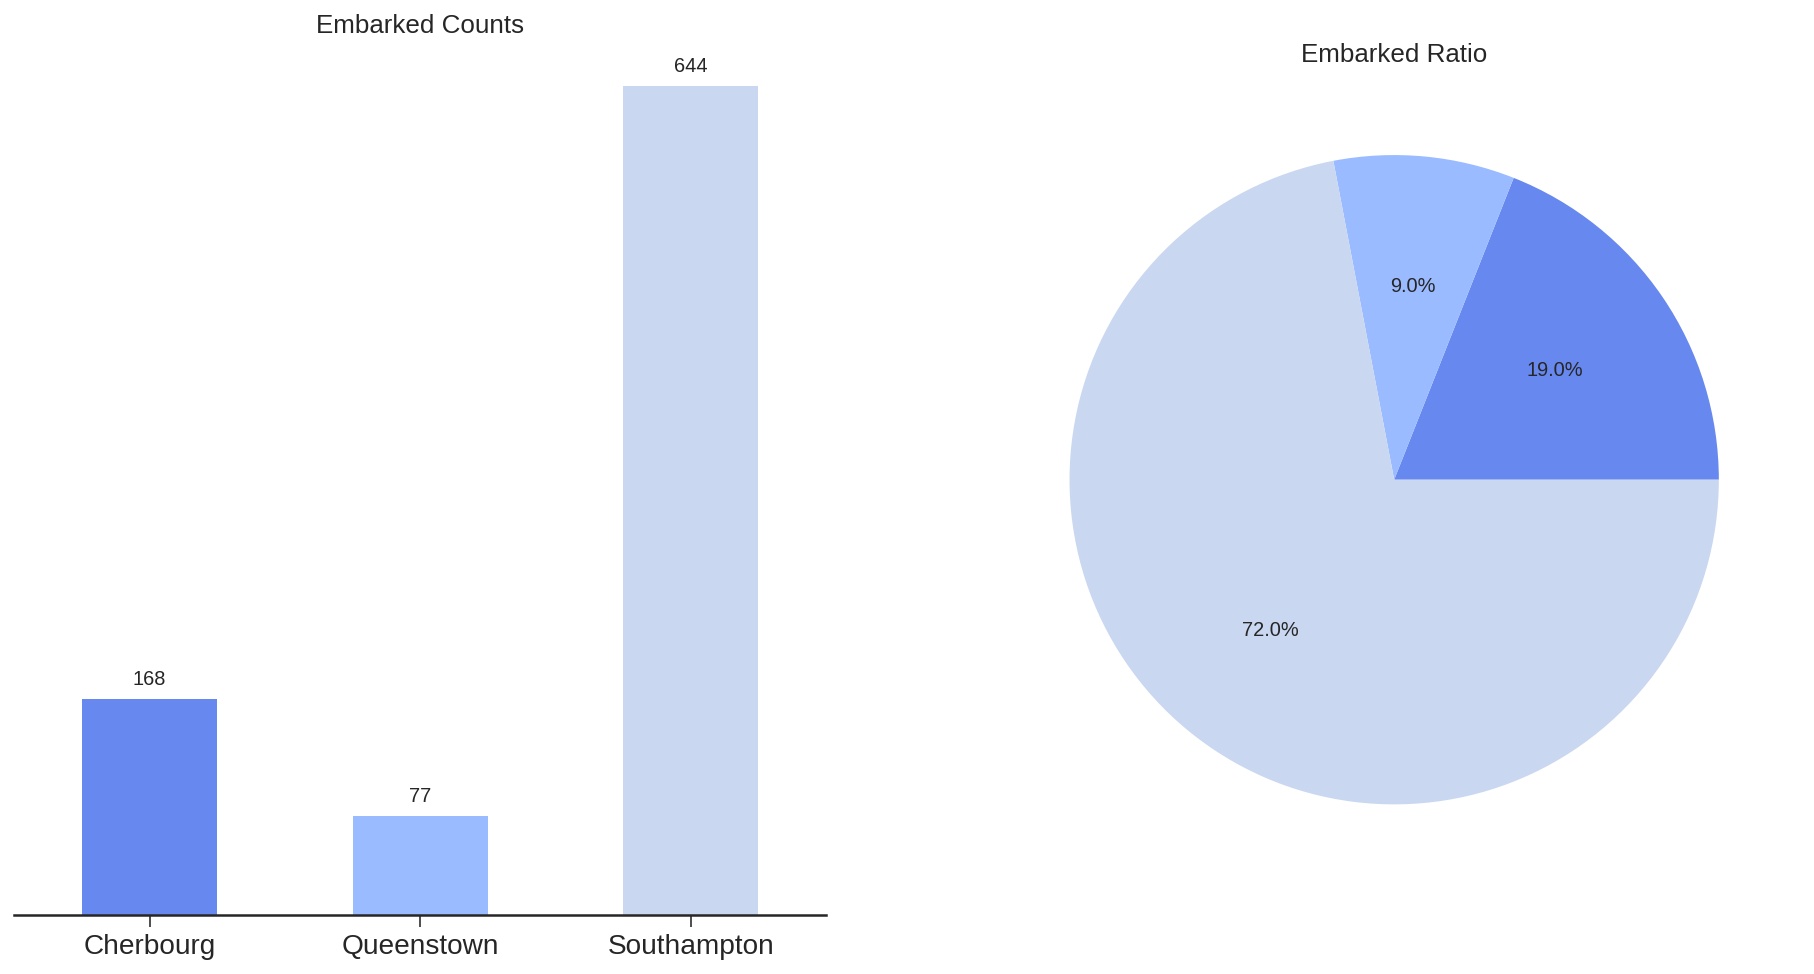

In [ ]:
Groupby_OneCol_comp_plot(descript, 'Embarked')

#Correlation of Survived with Embarked .

In [ ]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):     
    grouped = table
    
    #Tranform to percentages
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:   
        del grouped['Total']
    except:
        pass
    
    # rearrange the columns
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  # Rotate labels
    plt.legend(loc=legloc) # plot the legend normally
    
    #annotate the bars
    if percentage == True:
      for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
      for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass     
    # set custom title    
    plt.title(custom_title)
    
def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(14,6), width=0.6):   
    
    #Group by Placement and Representative and unstack by Placement
    grouped = df.groupby([col2,col1]).size().unstack(col2)
    
    #Make a totals column sort and delete after
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)
   
    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                               custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)

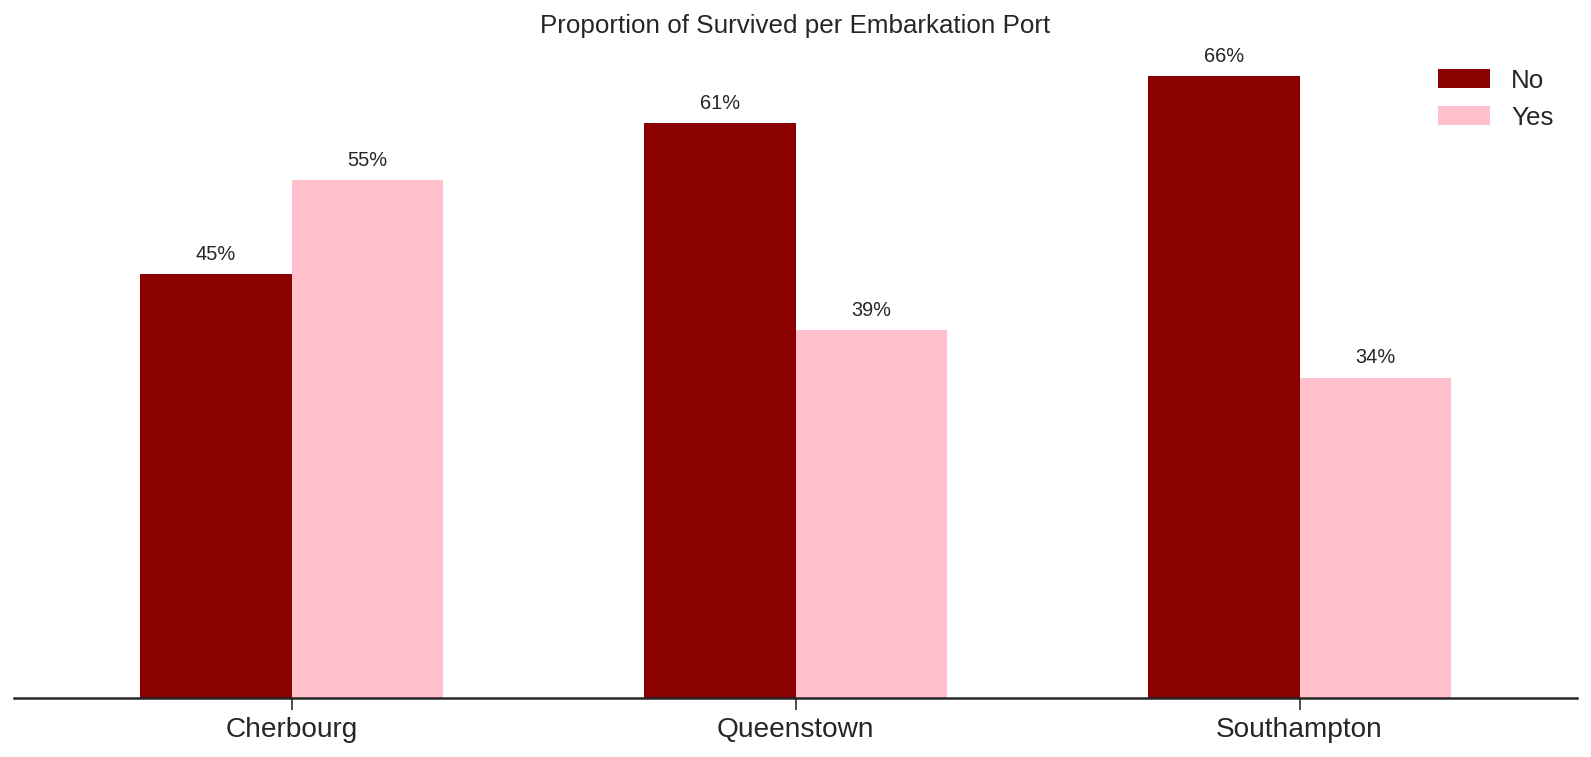

In [ ]:
Groupby_TwoCol_Plot(descript,'Embarked', 'Survived', color_palette=('darkred','pink'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per Embarkation Port')

#Correlation of Embarked with Pclass

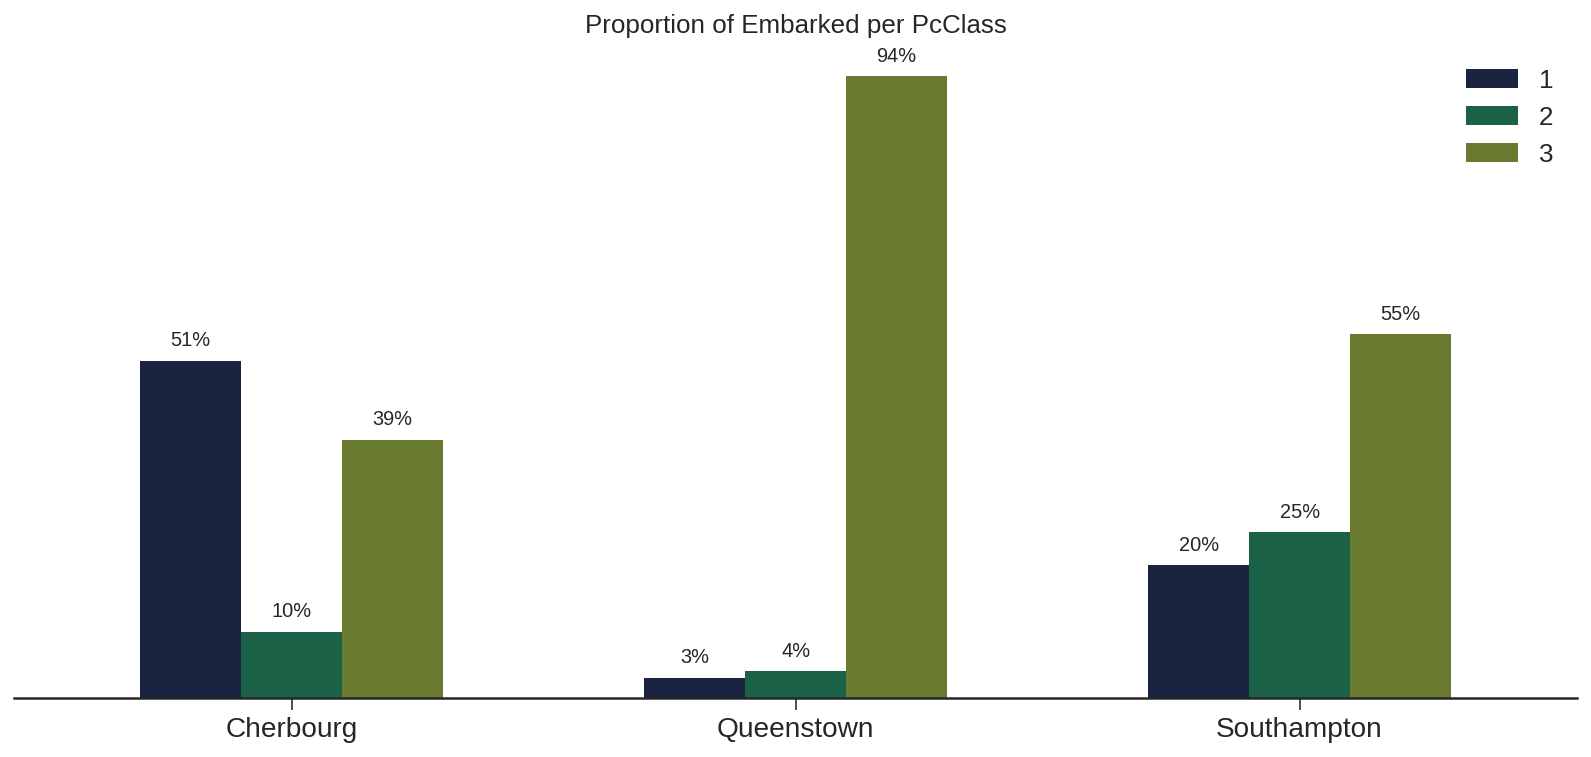

In [ ]:
#Calculate percentages of port passengers per Class
Groupby_TwoCol_Plot(descript,'Embarked', 'Pclass', color_palette=('cubehelix'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Embarked per PcClass', sorter = [1,2,3])

**Data Visualization II**
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution
of age with respect to each gender along with the information about whether they survived
or not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics

#Correlation of Embarked with Sex.

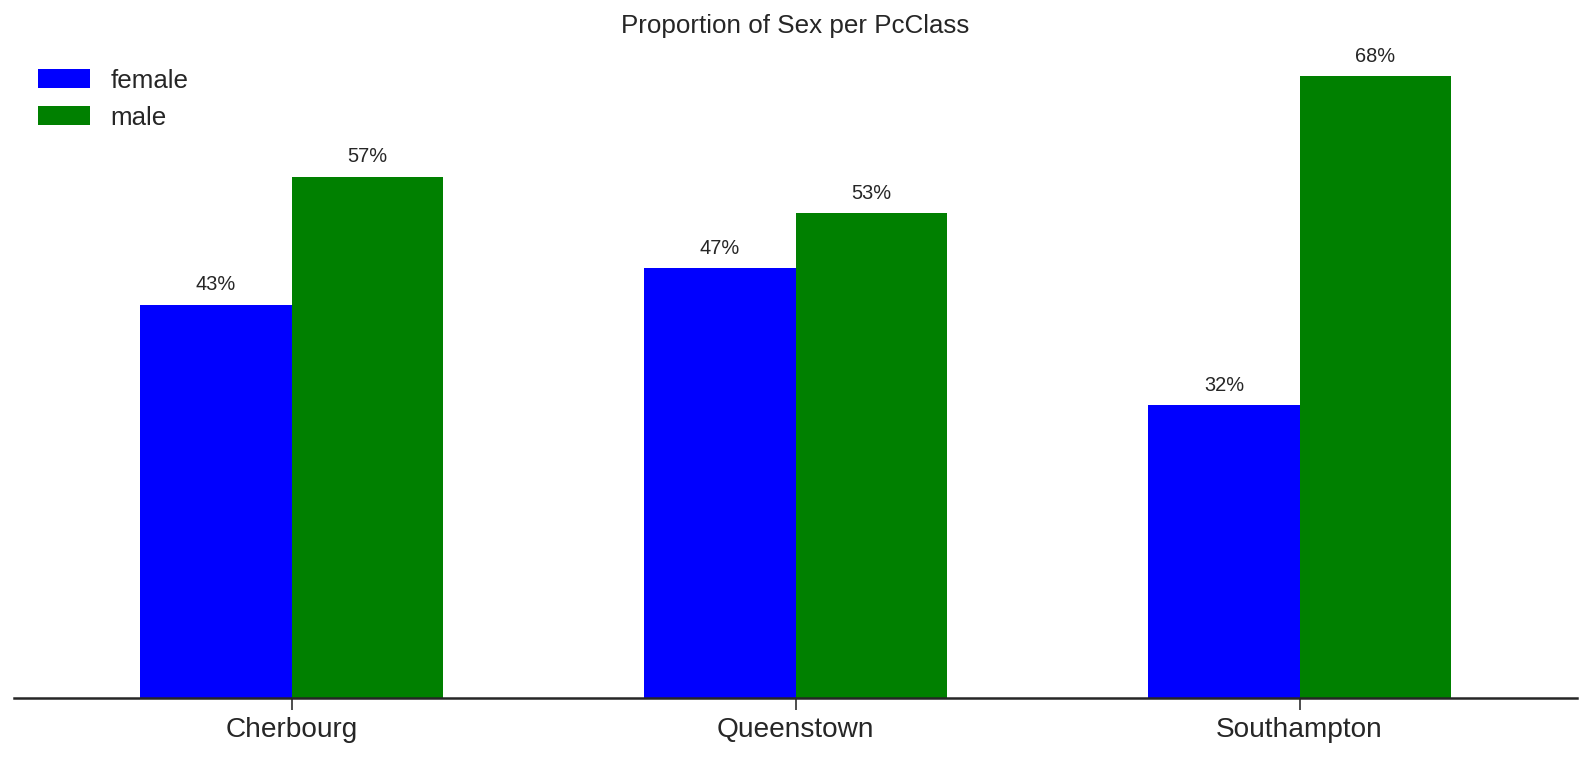

In [ ]:
#Calculate percentages of port passengers per Sex
Groupby_TwoCol_Plot(descript,'Embarked', 'Sex', color_palette=('blue','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

#Analysis of the Sex variable

Total No. of Sex:891


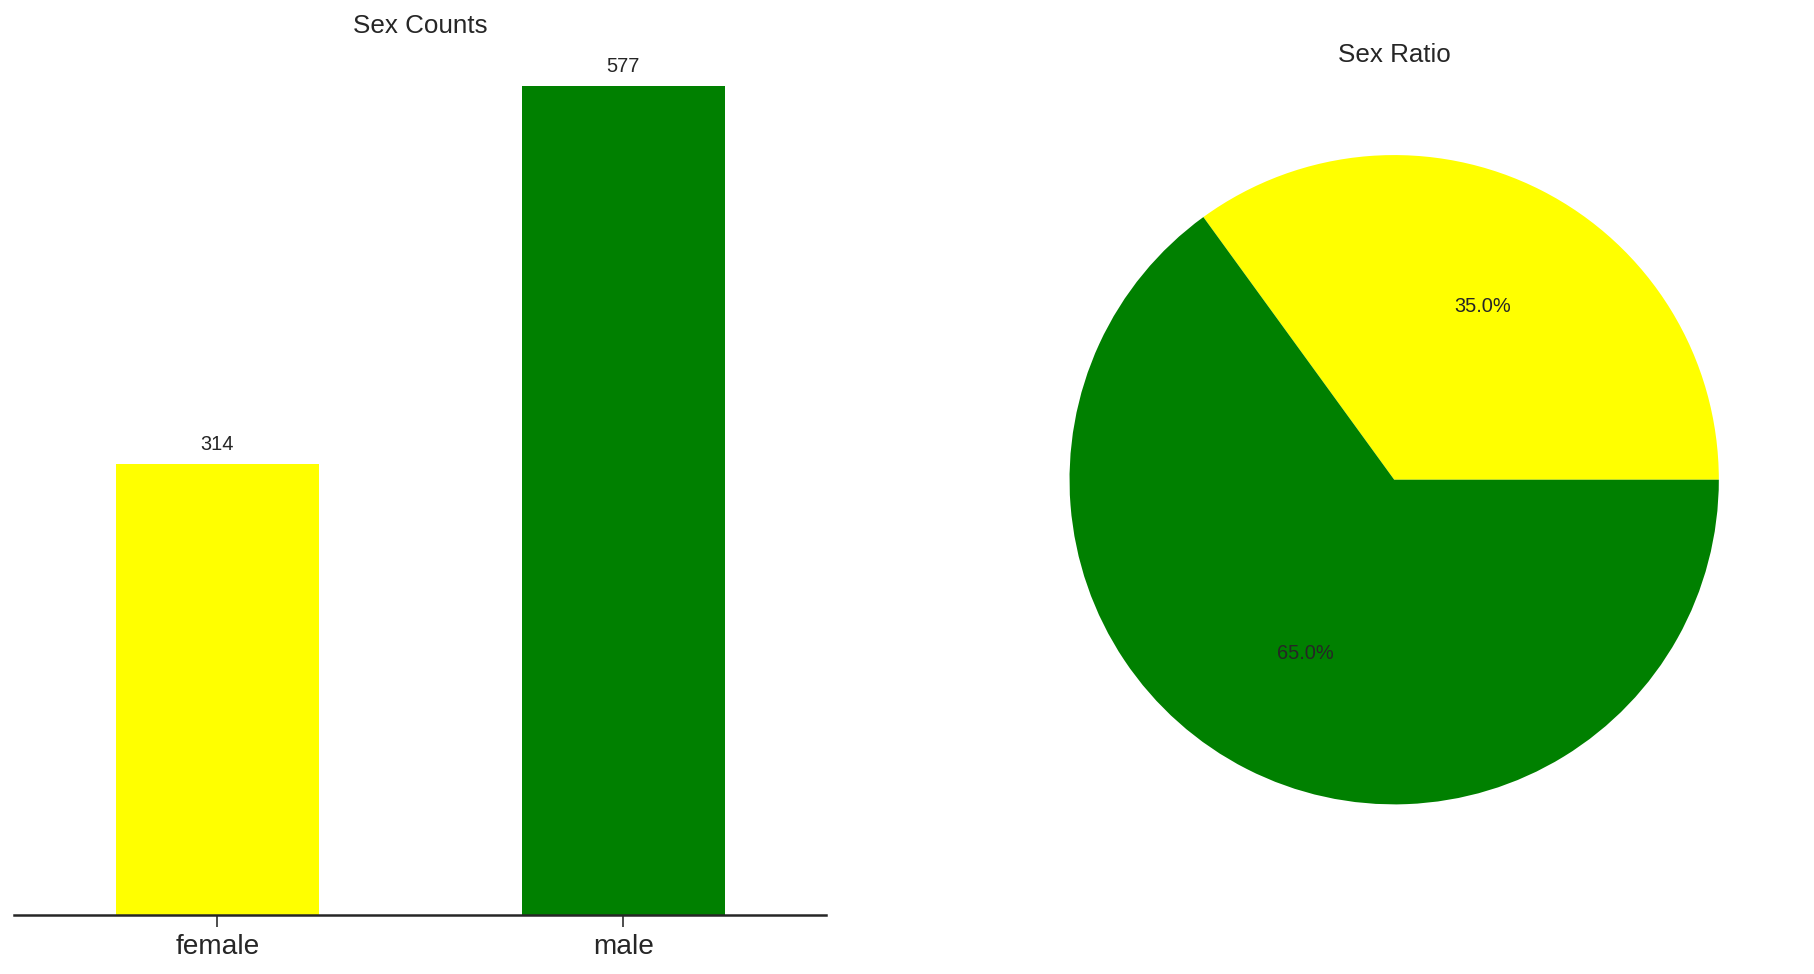

In [ ]:
Groupby_OneCol_comp_plot(descript, 'Sex', color_palette = ('yellow','green') )

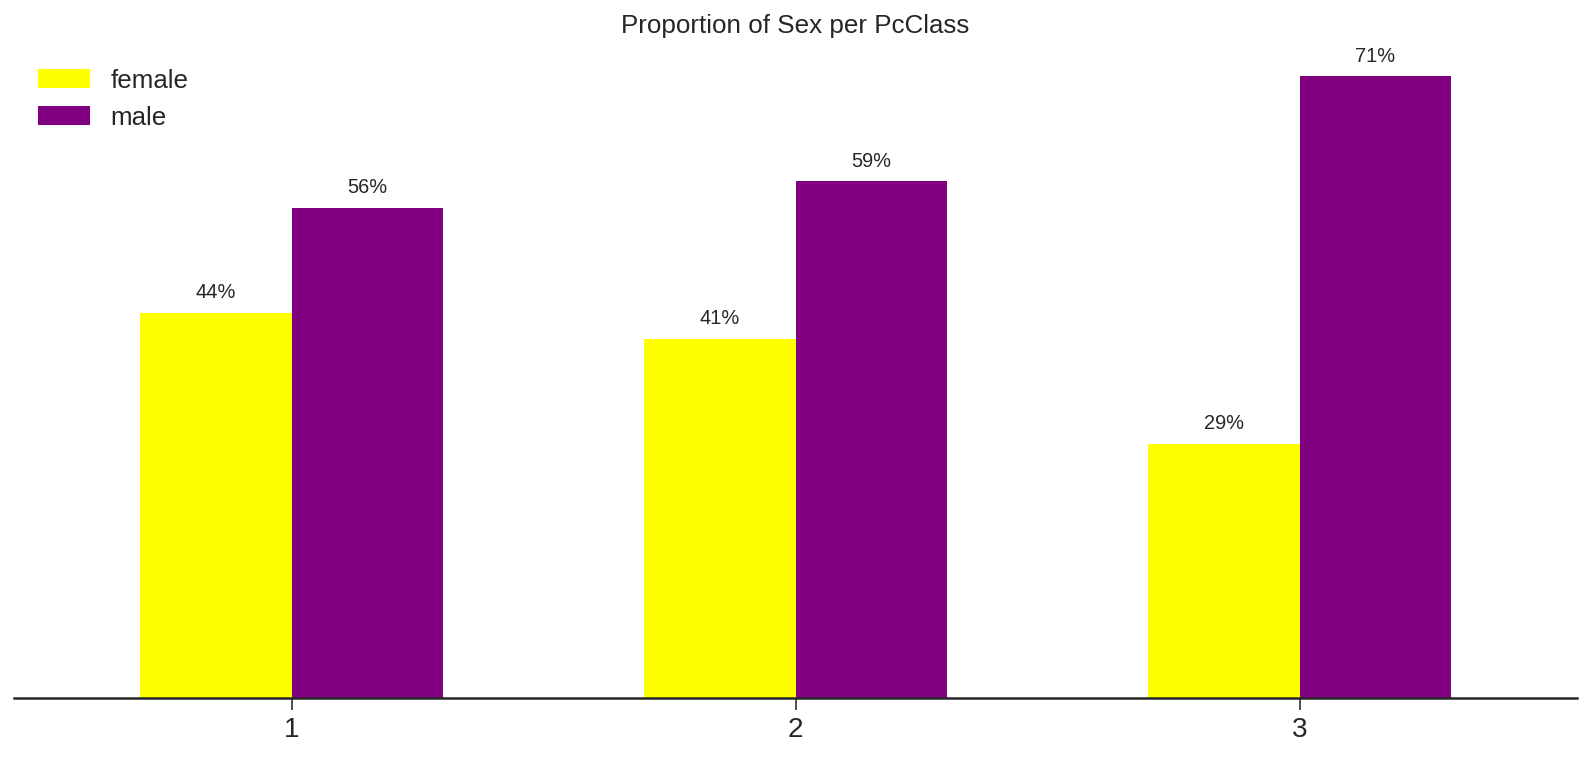

In [ ]:
#Calculate percentages of Pclass per Sex
Groupby_TwoCol_Plot(descript,'Pclass', 'Sex', color_palette=('yellow','purple'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

#Correlation of Sex with Survived

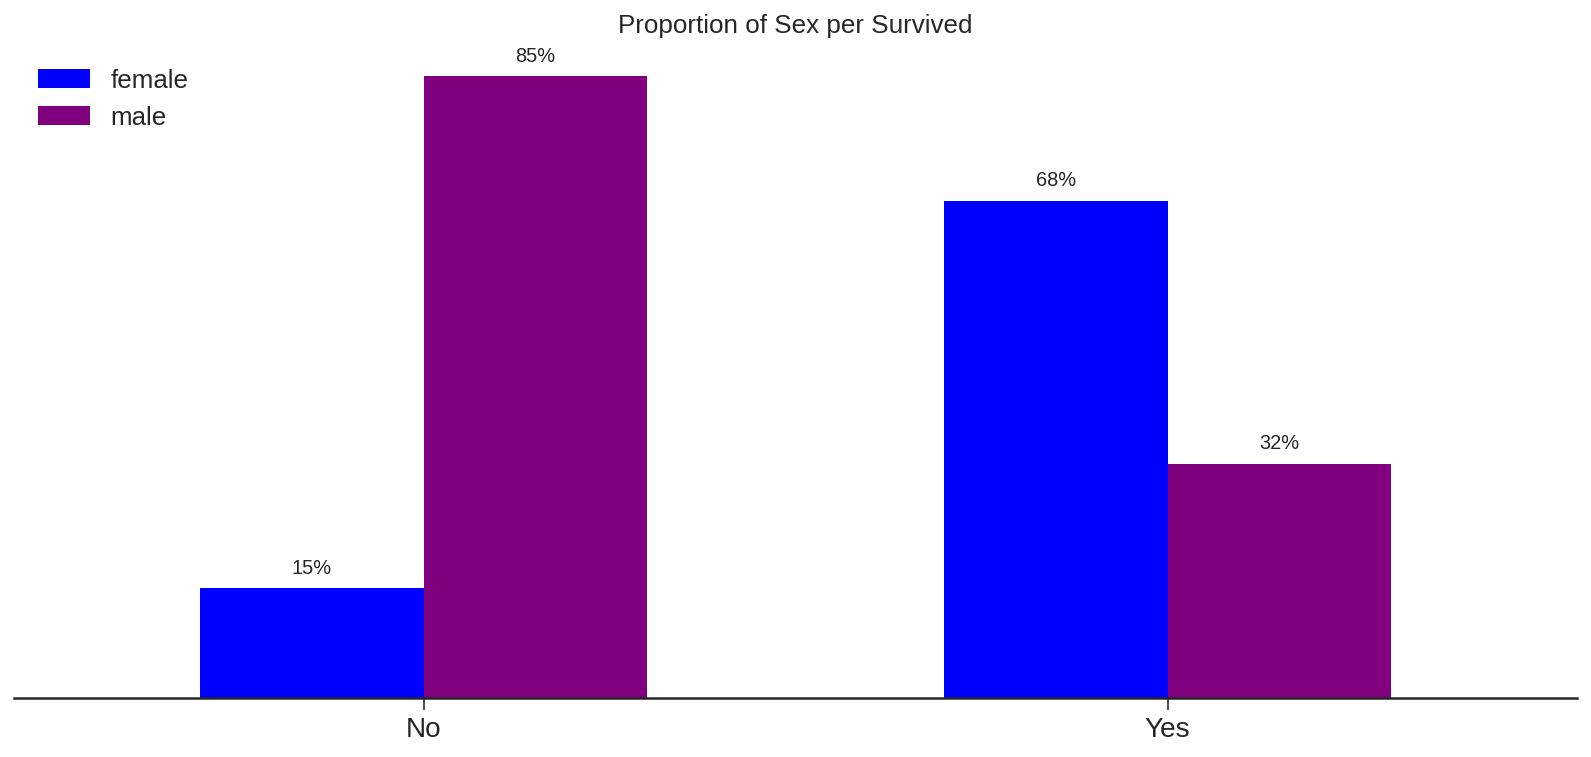

In [ ]:
Groupby_TwoCol_Plot(descript,'Survived', 'Sex', color_palette=('blue','purple'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per Survived',
                   legloc='upper right')

#Analysis of the Age variable

In [ ]:
#Make a dataframe for non missing 'Age'values
not_missing = n_titanic_data[(n_titanic_data['Age'].notnull())] 

#And replace the survived keys
not_missing.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print ('No. of Passengers with not missing Age Values:{}'.format(len(not_missing)))

No. of Passengers with not missing Age Values:714


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


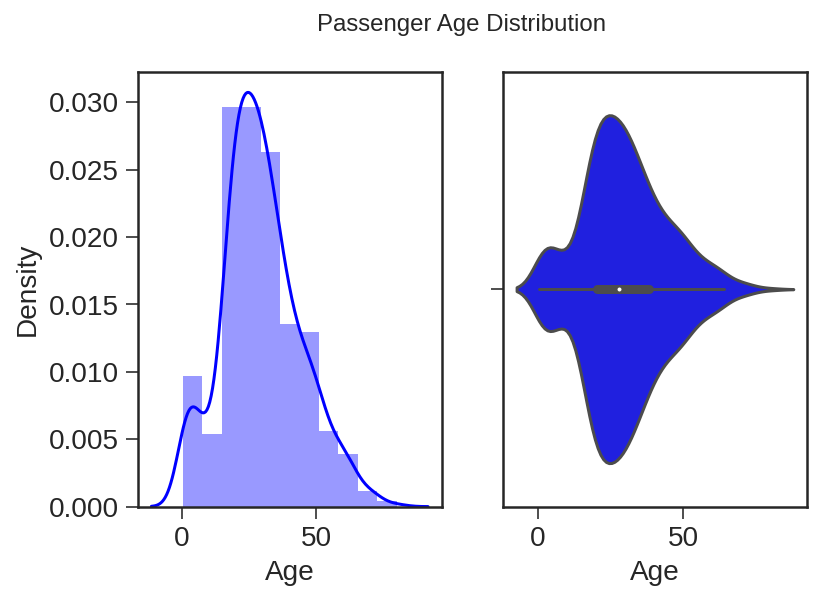

In [ ]:
ax=plt.figure()
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
sns.distplot(not_missing['Age'],bins=11)
ax.add_subplot(122)
sns.violinplot(not_missing['Age']);

In [ ]:
# Get summary descriptive statistics
v= pd.DataFrame(not_missing['Age'].describe())

#Change the index labels and round the values reported
v.index = ['Population Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
v = v.round(decimals=3)
v

,Age
Population Size,714.000
Mean,29.699
Std. Deviation,14.526
Min,0.420
25% Qt,20.125
Median,28.000
75% Qt,38.000
Max,80.000


We observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived. We would like to examine if this was by luck or by some other underlying reason (like the 'Women and Children first' rule).

In [ ]:
#Make a datframe with the sample populations
age = pd.DataFrame()
age['all'] = not_missing['Age']
not_survived = age['Not-survived'] = not_missing['Age'][not_missing['Survived']=='No']
survived = age['Survived'] = not_missing['Age'][not_missing['Survived']=='Yes']

#Get the summary statistics
var = age.describe()

#Change the index labels and round the values reported
var.index = ['Sample Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
var = var.round(decimals=3)

In [ ]:
var.loc[:,['Not-survived','Survived']]

,Not-survived,Survived
Sample Size,424.000,290.000
Mean,30.626,28.344
Std. Deviation,14.172,14.951
Min,1.000,0.420
25% Qt,21.000,19.000
Median,28.000,28.000
75% Qt,39.000,36.000
Max,74.000,80.000


#Survived- Age Statistical Chi-SquaredTest

We will test the following hypotheses:

H0 : The Null Hypothesis, that there is no relationship between the Survived and Age variables (independent)  →Oi≠Ei 


H1 : The Alternative Hypothesis, that there is a relationship between the Survived and Age variables (dependent)  →Oi=Ei

In [ ]:
#Create age-groups
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
              '70-80']
age_group_values = pd.cut(not_missing.Age, range(0,81,10),
                                   right=False, labels=age_labels)
not_missing.loc[:,'age-groups'] = age_group_values

#Set the value for the one 80-year old outside the bins 
#chi-squared is notvalid for no of observations below 5
not_missing.loc[not_missing['Age']>=80, 'age-groups'] = '70-80'

#Make an observed-table for chi-squared test
obs_table = pd.crosstab([not_missing['Survived']],[not_missing['age-groups']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
obs_table

age-groups,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived,,,,,,,,
No,24,61,143,94,55,28,13,6
Yes,38,41,77,73,34,20,6,1


In [ ]:
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))

chi2:17.42772160585894
dof:7
p:0.014836878112813482


For a=.05 and 7 degrees of freedom, p is smaller than 0.05 and we therefore reject the Null-Hypothesis and accept that Survived and Age are dependent variables and that there is indeed a relationship between age and survivabilit